In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/PrimeTrade/final_dataset.csv")

In [ ]:
df.head()

,date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Fee,classification,value
0,2024-02-12,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,0.345404,Greed,70
1,2024-02-12,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,0.005600,Greed,70
2,2024-02-12,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,0.050431,Greed,70
3,2024-02-12,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,0.050043,Greed,70
4,2024-02-12,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,0.003055,Greed,70


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35864 entries, 0 to 35863
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             35864 non-null  object 
 1   Account          35864 non-null  object 
 2   Coin             35864 non-null  object 
 3   Execution Price  35864 non-null  float64
 4   Size Tokens      35864 non-null  float64
 5   Size USD         35864 non-null  float64
 6   Side             35864 non-null  object 
 7   Start Position   35864 non-null  float64
 8   Direction        35864 non-null  object 
 9   Closed PnL       35864 non-null  float64
 10  Fee              35864 non-null  float64
 11  classification   35864 non-null  object 
 12  value            35864 non-null  int64  
dtypes: float64(6), int64(1), object(6)
memory usage: 3.6+ MB


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# It will have a value of 1 if 'Closed PnL' is positive (a win), and 0 otherwise.

In [ ]:
df['Win'] = (df['Closed PnL'] > 0).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35864 entries, 0 to 35863
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             35864 non-null  datetime64[ns]
 1   Account          35864 non-null  object        
 2   Coin             35864 non-null  object        
 3   Execution Price  35864 non-null  float64       
 4   Size Tokens      35864 non-null  float64       
 5   Size USD         35864 non-null  float64       
 6   Side             35864 non-null  object        
 7   Start Position   35864 non-null  float64       
 8   Direction        35864 non-null  object        
 9   Closed PnL       35864 non-null  float64       
 10  Fee              35864 non-null  float64       
 11  classification   35864 non-null  object        
 12  value            35864 non-null  int64         
 13  Win              35864 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int6

#i will group the data by the 'classification' column ('Fear', 'Greed', etc.).
# Then, i will calculate our key performance metrics for each sentiment category.

In [ ]:



sentiment_agg = df.groupby('classification').agg(
    Avg_PnL=('Closed PnL', 'mean'),
    Win_Rate=('Win', 'mean'),
    Avg_Trade_Size_USD=('Size USD', 'mean'),
    Trade_Count=('date', 'count')
)


# Convert Win_Rate to a percentage
sentiment_agg['Win_Rate'] = sentiment_agg['Win_Rate'] * 100

# Round the numbers to 2 decimal places for a cleaner look
sentiment_agg = sentiment_agg.round(2)


# Display the resulting table. This is our first key deliverable.
print("Fear vs. Greed Comparison Table:")
print(sentiment_agg)

Fear vs. Greed Comparison Table:
                Avg_PnL  Win_Rate  Avg_Trade_Size_USD  Trade_Count
classification                                                    
Extreme Fear       1.89     29.28             4118.76         2326
Extreme Greed    205.82     55.33             3242.09         5621
Fear             128.29     38.18             5744.78        13869
Greed             53.99     43.57             5051.88        11292
Neutral           27.09     49.49             4332.20         2756


Key Takeaway: Based on this data, the common advice to "be greedy when others are fearful" doesn't hold. Your most profitable opportunities have occurred when the market was in a state of Extreme Greed.



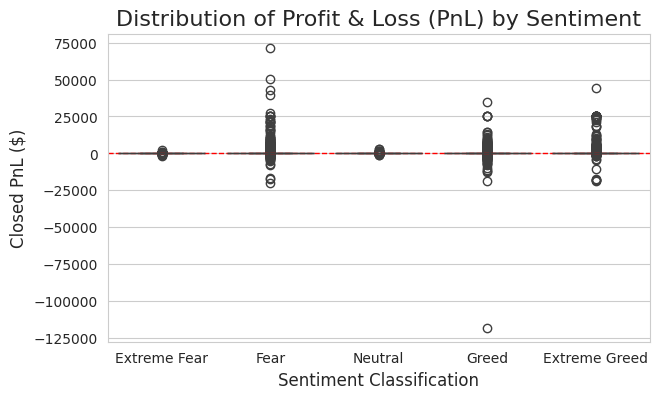

In [ ]:


# Set a professional style for the plot
sns.set_style("whitegrid")

# Create the figure for our plot
plt.figure(figsize=(7, 4))

# It's helpful to order the categories logically from fear to greed
# This makes the plot easier to interpret
plot_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']

# The boxplot shows the distribution of PnL for each category.
# You can see the median, quartiles, and outliers all in one view.
sns.boxplot(data=df, x='classification', y='Closed PnL', order=plot_order)

# Add titles and labels for clarity
plt.title('Distribution of Profit & Loss (PnL) by Sentiment', fontsize=16)
plt.xlabel('Sentiment Classification', fontsize=12)
plt.ylabel('Closed PnL ($)', fontsize=12)
plt.axhline(0, color='red', linestyle='--', linewidth=1) # Add a line at PnL = 0 for reference

# Display the plot
plt.show()

Key Takeaway: Your trading strategy appears to be one of low-probability, high-impact events. Most trades are breakeven, but a few large wins, primarily occurring during greedy periods, define the overall profitability

# To create a time-series plot, we first need to summarize our data for each day.
# We'll calculate the sum of PnL and the average sentiment value for each date

--- Daily Summary Data for Plotting ---
        date    Daily_PnL  Sentiment_Value
0 2023-01-05     0.000000             29.0
1 2023-05-12     0.000000             49.0
2 2024-01-01  -129.531460             65.0
3 2024-01-02     0.000000             71.0
4 2024-01-03  8244.241409             70.0


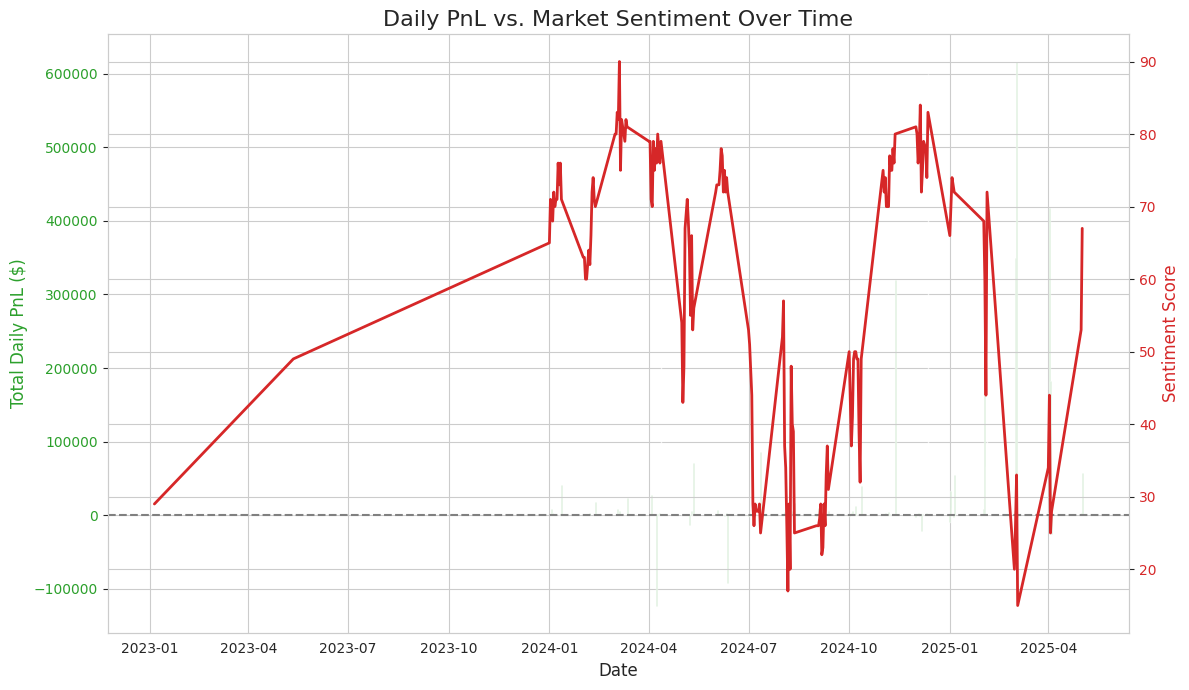

In [ ]:

daily_summary = df.groupby('date').agg(
    Daily_PnL=('Closed PnL', 'sum'),
    Sentiment_Value=('value', 'mean')
).reset_index()

print("--- Daily Summary Data for Plotting ---")
print(daily_summary.head())




fig, ax1 = plt.subplots(figsize=(12, 7))

color = 'tab:green'
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Total Daily PnL ($)', color=color, fontsize=12)
ax1.bar(daily_summary['date'], daily_summary['Daily_PnL'], color=color, alpha=0.7, label='Daily PnL')
ax1.tick_params(axis='y', labelcolor=color)
ax1.axhline(0, color='gray', linestyle='--') # Add a PnL = 0 line for reference

# Create a second y-axis that shares the same x-axis for the sentiment score
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Sentiment Score', color=color, fontsize=12)
ax2.plot(daily_summary['date'], daily_summary['Sentiment_Value'], color=color, linewidth=2, label='Sentiment Score')
ax2.tick_params(axis='y', labelcolor=color)

# Final touches
plt.title('Daily PnL vs. Market Sentiment Over Time', fontsize=16)
fig.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# i will use the 'daily_summary' DataFrame created in the previous step.
# The .corr() method calculates the pairwise correlation between columns.
# A value close to 1 means a strong positive correlation.
# A value close to -1 means a strong negative correlation.
# A value close to 0 means little to no linear correlation.

In [ ]:



correlation_matrix = daily_summary[['Daily_PnL', 'Sentiment_Value']].corr()

# --- Verification ---
print("--- Correlation Matrix ---")
print("This table quantifies the relationship between daily PnL and the sentiment score.")
print(correlation_matrix)

--- Correlation Matrix ---
This table quantifies the relationship between daily PnL and the sentiment score.
                 Daily_PnL  Sentiment_Value
Daily_PnL         1.000000        -0.057252
Sentiment_Value  -0.057252         1.000000


Key Takeaway: This result tells us there is no meaningful linear relationship between the sentiment on a given day and the profit made on that same day. In other words, knowing that the market is in a state of "Greed" today doesn't give you a statistically reliable way to predict if today's PnL will be positive or negative in a linear fashion.

In [ ]:
#  Analyze the Lag Effect of Sentiment on PnL

# We create a new column 'Yesterday_Sentiment' by 'shifting' the 'Sentiment_Value' column down by one day.
daily_summary['Yesterday_Sentiment'] = daily_summary['Sentiment_Value'].shift(1)

# Now we calculate the correlation between today's PnL and yesterday's sentiment.
# We use .dropna() to remove the first row, which will have a NaN value after shifting.
lag_correlation = daily_summary[['Daily_PnL', 'Yesterday_Sentiment']].dropna().corr()


#  Verification ---
print("Lagged Correlation Matrix ---")
print("This table shows the relationship between Today's PnL and Yesterday's Sentiment.")
print(lag_correlation)

--- Lagged Correlation Matrix ---
This table shows the relationship between Today's PnL and Yesterday's Sentiment.
                     Daily_PnL  Yesterday_Sentiment
Daily_PnL             1.000000            -0.125908
Yesterday_Sentiment  -0.125908             1.000000


No observatory relation of the data.. hebnce We've established that any relationship between sentiment and PnL is weak and likely non-linear

Advanced **analysis**

Found 1 'Fear to Greed' flip events.
Found 2 'Greed to Fear' flip events.


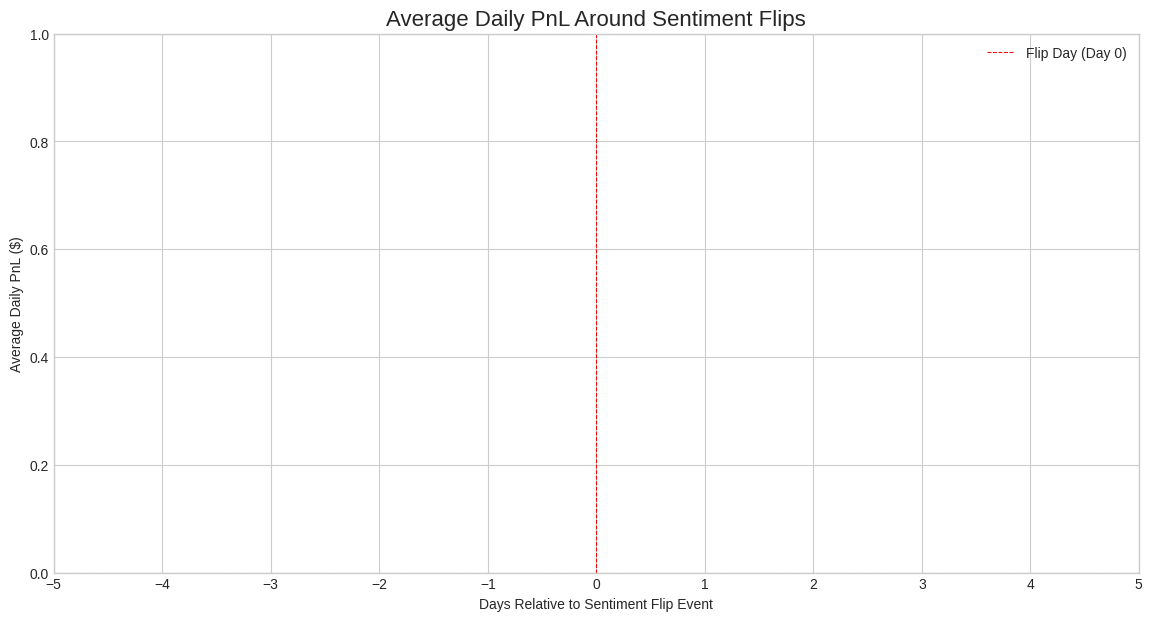

In [20]:
# Import libraries if not already done
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Prepare Daily Data ---
# We need a daily view of both PnL and the dominant sentiment classification.
# The 'mode()[0]' gets the most frequent classification for that day.
daily_agg = df.groupby('date').agg(
    Daily_PnL=('Closed PnL', 'sum'),
    Classification=('classification', lambda x: x.mode()[0])
).sort_index()

# Create a 'previous_day_class' column to detect flips
daily_agg['previous_day_class'] = daily_agg['Classification'].shift(1)


# -Identify the Flip Days ---
# A "Fear to Greed" flip is when yesterday was Fear and today is Greed.
fear_to_greed_dates = daily_agg[
    (daily_agg['previous_day_class'] == 'Fear') &
    (daily_agg['Classification'] == 'Greed')
].index

# A "Greed to Fear" flip is the opposite.
greed_to_fear_dates = daily_agg[
    (daily_agg['previous_day_class'] == 'Greed') &
    (daily_agg['Classification'] == 'Fear')
].index

print(f"Found {len(fear_to_greed_dates)} 'Fear to Greed' flip events.")
print(f"Found {len(greed_to_fear_dates)} 'Greed to Fear' flip events.")


# - Calculate Average PnL in the Event Window ---
def calculate_window_pnl(flip_dates, daily_data, window_size=5):
    all_windows = []
    for event_date in flip_dates:
        window_start = event_date - pd.Timedelta(days=window_size)
        window_end = event_date + pd.Timedelta(days=window_size)

        # Get the PnL for the days in the window
        window_pnl = daily_data.loc[window_start:window_end, 'Daily_PnL']

        # Align the window so the event date is at index 0
        window_pnl.index = (window_pnl.index - event_date).days

        # Only include full windows
        if len(window_pnl) == (2 * window_size + 1):
            all_windows.append(window_pnl)

    # If any full windows were found, calculate the average PnL for each day
    if all_windows:
        return pd.concat(all_windows, axis=1).mean(axis=1)
    else:
        return pd.Series()

# Calculate the average PnL for both flip types
avg_pnl_f2g = calculate_window_pnl(fear_to_greed_dates, daily_agg)
avg_pnl_g2f = calculate_window_pnl(greed_to_fear_dates, daily_agg)


#
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 7))

if not avg_pnl_f2g.empty:
    avg_pnl_f2g.plot(ax=ax, marker='o', linestyle='-', label='Fear → Greed Flip')
if not avg_pnl_g2f.empty:
    avg_pnl_g2f.plot(ax=ax, marker='x', linestyle='--', label='Greed → Fear Flip')

ax.axhline(0, color='black', linewidth=0.75, linestyle='--')
ax.axvline(0, color='red', linewidth=0.75, linestyle='--', label='Flip Day (Day 0)')

ax.set_title('Average Daily PnL Around Sentiment Flips', fontsize=16)
ax.set_xlabel('Days Relative to Sentiment Flip Event')
ax.set_ylabel('Average Daily PnL ($)')
ax.legend()
plt.xticks(range(-5, 6))
plt.show()

In [21]:
#  Isolatemh Trades by Sentiment Extreme ---
extreme_greed_trades = df[df['classification'] == 'Extreme Greed']
extreme_fear_trades = df[df['classification'] == 'Extreme Fear']

#. Calculateng Performance Metrics for Each Zone ---

# Metrics for Extreme Greed zone
eg_metrics = {
    "Win Rate (%)": extreme_greed_trades['Win'].mean() * 100,
    "Average PnL ($)": extreme_greed_trades['Closed PnL'].mean(),
    "Total PnL ($)": extreme_greed_trades['Closed PnL'].sum(),
    "Number of Trades": len(extreme_greed_trades)
}

# Metrics for Extreme Fear zone
ef_metrics = {
    "Win Rate (%)": extreme_fear_trades['Win'].mean() * 100,
    "Average PnL ($)": extreme_fear_trades['Closed PnL'].mean(),
    "Total PnL ($)": extreme_fear_trades['Closed PnL'].sum(),
    "Number of Trades": len(extreme_fear_trades)
}


# . Displayng the Comparison ---
print("--- Analysis of High-Probability Trading Zones ---")

print("\n📈 'Extreme Greed' Trading Zone:")
for metric, value in eg_metrics.items():
    print(f"  - {metric}: {value:,.2f}")

print("\n📉 'Extreme Fear' Trading Zone:")
for metric, value in ef_metrics.items():
    print(f"  - {metric}: {value:,.2f}")


--- Analysis of High-Probability Trading Zones ---

📈 'Extreme Greed' Trading Zone:
  - Win Rate (%): 55.33
  - Average PnL ($): 205.82
  - Total PnL ($): 1,156,893.68
  - Number of Trades: 5,621.00

📉 'Extreme Fear' Trading Zone:
  - Win Rate (%): 29.28
  - Average PnL ($): 1.89
  - Total PnL ($): 4,399.94
  - Number of Trades: 2,326.00


The data strongly suggests a clear strategy: trade actively during 'Extreme Greed' and consider halting or significantly reducing trading activity during 'Extreme Fear'

In [22]:
# --- 1. Filter for the 'Extreme Greed' Zone ---
# We'll use the DataFrame of trades made only during Extreme Greed
extreme_greed_trades = df[df['classification'] == 'Extreme Greed']


# --- 2. Segment Analysis by Coin (within Extreme Greed) ---
print("--- Segment Analysis within the 'Extreme Greed' Zone ---")

coin_segment = extreme_greed_trades.groupby('Coin').agg(
    Win_Rate_Pct=('Win', lambda x: x.mean() * 100),
    Avg_PnL=('Closed PnL', 'mean'),
    Total_PnL=('Closed PnL', 'sum'),
    Trade_Count=('date', 'count')
).sort_values(by='Total_PnL', ascending=False)

print("\n--- Top 10 Performing Coins (during Extreme Greed) ---")
print(coin_segment.round(2).head(10))


# --- 3. Segment Analysis by Direction (within Extreme Greed) ---
direction_segment = extreme_greed_trades.groupby('Direction').agg(
    Win_Rate_Pct=('Win', lambda x: x.mean() * 100),
    Avg_PnL=('Closed PnL', 'mean'),
    Total_PnL=('Closed PnL', 'sum'),
    Trade_Count=('date', 'count')
).sort_values(by='Total_PnL', ascending=False)

print("\n--- Performing Directions (during Extreme Greed) ---")
print(direction_segment.round(2))

--- Segment Analysis within the 'Extreme Greed' Zone ---

--- Top 10 Performing Coins (during Extreme Greed) ---
           Win_Rate_Pct  Avg_PnL   Total_PnL  Trade_Count
Coin                                                     
@107              85.68   495.65  1187083.83         2395
BTC               31.97    41.56    13258.09          319
AAVE              48.04    85.36     8706.88          102
PNUT              52.63   449.72     8544.69           19
GOAT              63.24   113.45     7714.84           68
TURBO             58.62   258.33     7491.47           29
WLD               64.56    63.48     5014.85           79
PURR/USDC         60.00    36.90     4243.73          115
ME                80.00   276.70     2767.03           10
MEME              46.34    62.16     2548.37           41

--- Performing Directions (during Extreme Greed) ---
                      Win_Rate_Pct  Avg_PnL   Total_PnL  Trade_Count
Direction                                                           